In [1]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

import pandas as pd

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

In [2]:
gnb = GaussianNB()
fitt = gnb.fit(iris.data,iris.target)
y_pred = fitt.predict(iris.data)
fitt.predict_proba(iris.data)[[1,48,51,100]]

array([[1.00000000e+000, 1.51480769e-017, 2.34820051e-025],
       [1.00000000e+000, 2.63876217e-018, 2.79566024e-025],
       [7.27347795e-102, 9.45169639e-001, 5.48303606e-002],
       [3.23245181e-254, 6.35381031e-011, 1.00000000e+000]])

In [3]:
gnb2 = GaussianNB(priors=[1/100,1/100,98/100])
fittt = gnb2.fit(iris.data,iris.target)
y_pred2 = fittt.predict(iris.data)

from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,y_pred2)

array([[50,  0,  0],
       [ 0, 33, 17],
       [ 0,  0, 50]], dtype=int64)

In [4]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
X = np.random.randint(5, size=(6,100))
y  =np.array([1,2,3,4,5,6])

In [5]:
clf = MultinomialNB()
clf.fit(X,y)
clf.predict(X[2:3])

array([3])

In [6]:
clf.predict_proba(X[2:3])

array([[5.73308467e-32, 4.45289097e-37, 1.00000000e+00, 1.13808496e-29,
        1.22426106e-39, 6.19173144e-38]])

In [7]:
clf2 = MultinomialNB(class_prior=[0.1,0.1999,0.0001,0.1,0.1,0.1])
clf2.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=[0.1, 0.1999, 0.0001, 0.1, 0.1, 0.1],
              fit_prior=True)

In [ ]:
clf2.predict_proba(X[2:3])

In [12]:
from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

In [13]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(x,y)
y_pred = clf.predict(x)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

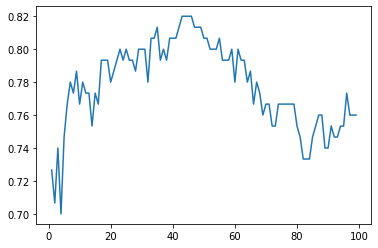

In [14]:
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn,x,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)

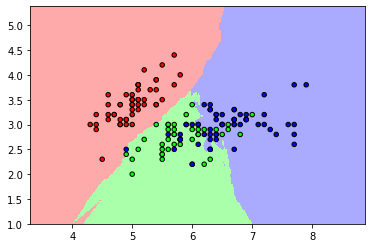

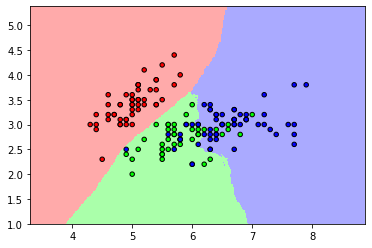

In [15]:
n_neighbors = 40
h = .02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for weights in ['uniform','distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(x,y)
    
    x_min, x_max = x[:,0].min()-1,x[:,0].max()+1
    y_min, y_max = x[:,1].min()-1,x[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    z= z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,z,cmap=cmap_light)
    plt.scatter(x[:,0],x[:,1],c=y, cmap = cmap_bold,edgecolors='k',s=20)